In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_csv('../../Data/20x43_DEFG960_verified.csv')
data.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Source Verified,Verified,loan_status_bin
0,1.702216,-0.172701,0.364336,-0.958139,-0.958139,-0.223151,1.726471,0.393836,1.459252,-0.308942,1.897872,-0.433437,1.792467,-0.085233,-0.158784,0.917668,-0.895985,-0.258619,1.460157,1.320983,0.835275,0.979311,-0.028859,-0.936283,-0.358718,1.179902,-0.118595,4.170474,-0.763236,-0.297985,-0.147734,-0.182339,-0.216915,-0.213386,-0.564857,-0.060159,-0.252459,-0.16891,-0.083566,0.968055,-0.968055,1.0
1,-0.647170,-0.063573,-1.189601,1.905734,1.905734,-0.629302,-0.640777,-0.613814,-1.073685,-0.670536,1.157815,0.419012,-0.290740,-0.085233,-0.158784,-0.417357,-0.966701,-0.258619,1.460157,-0.053373,0.517474,-0.593141,-0.028859,-0.936283,-0.358718,1.179902,-0.118595,-0.239781,-0.763236,3.355876,-0.147734,-0.182339,-0.216915,-0.213386,-0.564857,-0.060159,-0.252459,-0.16891,-0.083566,0.968055,-0.968055,0.0
2,-0.945315,-0.256646,-0.315924,0.083269,0.083269,0.526344,-0.876796,-0.949698,-1.150441,-0.586211,0.417758,-0.433437,-0.866947,-0.085233,-0.158784,-0.417357,0.188324,-0.258619,1.460157,1.320983,1.470877,-1.641442,-0.028859,1.068053,-0.358718,-0.847528,-0.118595,-0.239781,1.310211,-0.297985,-0.147734,-0.182339,-0.216915,-0.213386,-0.564857,-0.060159,-0.252459,-0.16891,-0.083566,0.968055,-0.968055,0.0
3,0.283044,-0.046784,0.047834,-0.697787,-0.697787,-0.629302,0.274942,-0.109989,0.538184,-0.315469,2.637929,2.976359,-0.866947,-0.085233,-0.158784,0.917668,-0.459904,-0.258619,1.460157,-0.053373,0.517474,-0.593141,-0.028859,1.068053,-0.358718,-0.847528,-0.118595,-0.239781,-0.763236,-0.297985,-0.147734,-0.182339,-0.216915,-0.213386,-0.564857,-0.060159,3.961037,-0.16891,-0.083566,0.968055,-0.968055,1.0
4,1.797622,-0.239857,0.491816,3.988552,3.988552,-0.629302,1.765848,-0.949698,-0.152617,-0.671631,1.157815,-0.433437,-0.866947,-0.085233,-0.158784,-0.417357,-1.296707,-0.258619,1.460157,-0.053373,0.517474,-0.855216,-0.028859,-0.936283,2.787703,-0.847528,-0.118595,-0.239781,-0.763236,-0.297985,-0.147734,-0.182339,-0.216915,4.686340,-0.564857,-0.060159,-0.252459,-0.16891,-0.083566,0.968055,-0.968055,1.0


In [4]:
data.shape

(3605, 42)

In [5]:
data.loan_status_bin.value_counts()
#0 = Defaulted Loans
#1 = Loans Paid In Full

1.0    2718
0.0     887
Name: loan_status_bin, dtype: int64

In [6]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(3605, 41)

In [7]:
y = data['loan_status_bin']

In [8]:
lr1 = LogisticRegression()

In [9]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [10]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.75450763 0.75034674 0.74895978 0.76421637 0.75589459]
0.7547850208044383


In [11]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[  44,  843],
       [  41, 2677]])

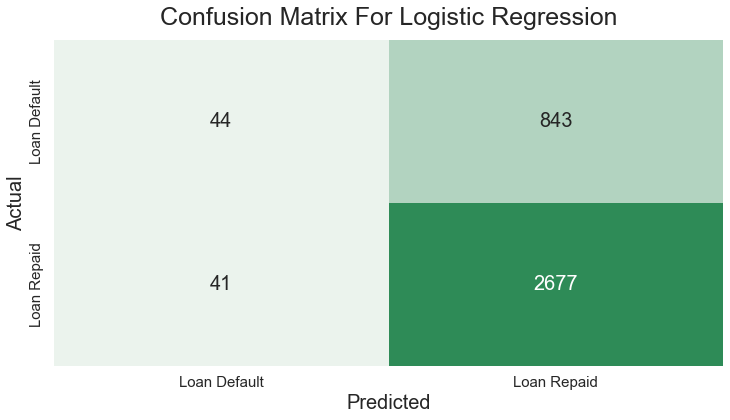

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [13]:
accuracy_score(y, y_pred)

0.7547850208044383

In [14]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

2677
843
41
44
0.7547850208044383


In [15]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Defaulted
#1 = Loan Fully Paid

good_loan = data.loan_status_bin.value_counts()[1]
bad_loan = data.loan_status_bin.value_counts()[0]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment would give us 59% chance of pickkng a good loan

1.0    2718
0.0     887
Name: loan_status_bin, dtype: int64

0.7539528432732316


In [16]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 0.1% better than Null Model or "random investment"
TP / (TP+FP)

0.7605113636363636

In [17]:
#What if we "balance" the weight class to avoid "imbalanced" nature...No Change! 

In [18]:
lr_balanced = LogisticRegression(class_weight='balanced')

In [19]:
steps_balanced = [('model', lr_balanced)]
pipeline_balanced = Pipeline(steps=steps)

In [20]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline_balanced, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.75450763 0.75034674 0.74895978 0.76421637 0.75589459]
0.7547850208044383


In [21]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred_balanced = cross_val_predict(pipeline_balanced, X, y, cv=cv, n_jobs=-1)
conf_mat_balanced = confusion_matrix(y, y_pred_balanced)
conf_mat_balanced

array([[  44,  843],
       [  41, 2677]])

In [22]:
#Obtain predicted probabilities (not predicted classes) from RSKF: 
y_pred_prob = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [23]:
y_pred_prob

array([[0.44775264, 0.55224736],
       [0.26136703, 0.73863297],
       [0.32544505, 0.67455495],
       ...,
       [0.25464934, 0.74535066],
       [0.29432207, 0.70567793],
       [0.37683531, 0.62316469]])

In [32]:
#Obtaining classification based on desired threshold of 0.8: 

y_pred_success = (y_pred_prob[:, 1] > 0.93).astype('float')
y_pred_success

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
conf_mat = confusion_matrix(y, y_pred_success)
conf_mat

array([[ 878,    9],
       [2640,   78]])

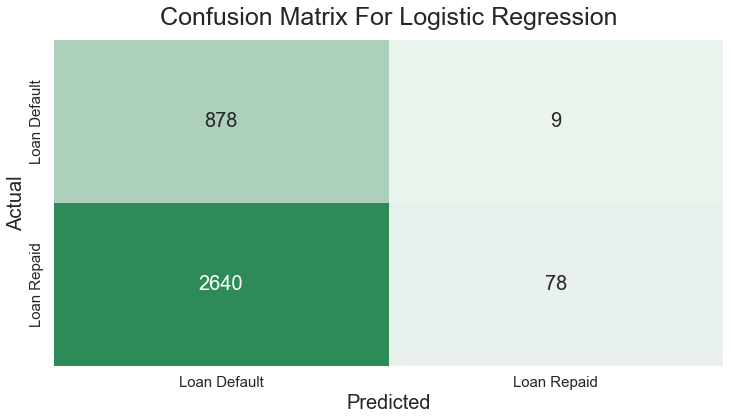

In [34]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [35]:
accuracy_score(y, y_pred_success)

0.2651872399445215

In [36]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

78
9
2640
878
0.2651872399445215


In [37]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.896551724137931

In [30]:
thresh = []
PosPredVal = []

for i in range(0,100,1):
    y_pred_success = (y_pred_prob[:, 1] > (i/100)).astype('float')
    conf_mat = confusion_matrix(y, y_pred_success)
    TN, FP, FN, TP = conf_mat.ravel()
    thresh.append(i)
    PosPredVal.append((TP/(TP+FP)))

print(np.max(PosPredVal))
print(PosPredVal.index(np.max(PosPredVal)))

0.896551724137931
93


In [31]:
PosPredVal

[0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7539528432732316,
 0.7538845726970034,
 0.7538845726970034,
 0.7538845726970034,
 0.7538845726970034,
 0.7538845726970034,
 0.7540938107132945,
 0.7543031649083842,
 0.7542349347403499,
 0.7540983606557377,
 0.7540300166759311,
 0.754239644147901,
 0.754239644147901,
 0.7544493882091212,
 0.7545226829947119,
 0.7543859649122807,
 0.7545961002785515,
 0.7548117154811715,
 0.7550223214285714,
 0.755586592178771,
 0.7564389697648376,
 0.7577883805781644,
 0.7588732394366

In [30]:
## Next question. what was characteristic of the 217 loans that defaulted??
## Get all loans which you predicted greater than 80% and find out which ones defaulted.
## Any pattern?????

In [31]:
#Do we drop all observations where the source is not verified? 
#Do we drop all observations loan amount is greater than half of one's income? 